In [1]:
import pandas as  pd
import numpy as np
import seaborn
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
import matplotlib.pyplot as plt
seaborn.set()
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

In [2]:
housing_data = pd.read_csv('HousingData.csv')
housing_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
housing_data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [4]:
housing_data_no_null = housing_data.dropna(axis=0)

In [5]:
housing_data_no_null.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
inputs = housing_data_no_null.drop(['MEDV'], axis=1)
targets = housing_data_no_null['MEDV']

In [7]:
scaled_inputs = StandardScaler().fit_transform(inputs)
targets

0      24.0
1      21.6
2      34.7
3      33.4
5      28.7
       ... 
499    17.5
500    16.8
502    20.6
503    23.9
504    22.0
Name: MEDV, Length: 394, dtype: float64

In [8]:
reg1 = LinearRegression()
reg1.fit(scaled_inputs, targets)

LinearRegression()

In [9]:
summary_table = pd.DataFrame(data=inputs.columns.values,columns=['Features'])
summary_table['Coeff'] = reg1.coef_
summary_table['P-values'] = f_regression(inputs,targets)[1].round(3)
summary_table

,Features,Coeff,P-values
0,CRIM,-0.896959,0.000
1,ZN,1.169985,0.000
2,INDUS,0.209603,0.000
3,CHAS,0.699682,0.001
4,NOX,-2.029941,0.000
5,RM,2.985849,0.000
6,AGE,-0.361836,0.000
7,DIS,-3.056900,0.000
8,RAD,2.464873,0.000
9,TAX,-2.209895,0.000


In [10]:
#Taking the log of target for making graph linear
targets = np.log(targets)

<AxesSubplot:xlabel='CRIM', ylabel='MEDV'>

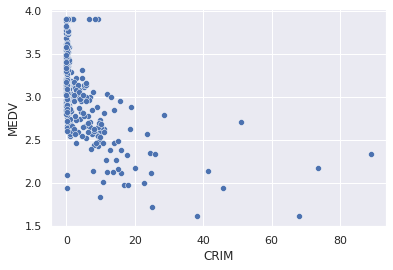

In [11]:
#MAKING CRIM LINEAR
log_crim = np.log(inputs['CRIM'])
#inputs['CRIM'] = log_crim
seaborn.scatterplot(inputs['CRIM'], targets)

<AxesSubplot:xlabel='ZN', ylabel='MEDV'>

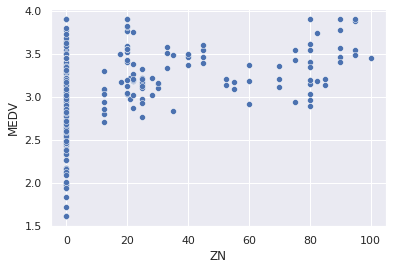

In [12]:
#MAKING ZN LINEAR
seaborn.scatterplot(inputs['ZN'], targets)

In [13]:
#REMOVING CHAS AND RAD BECAUSE OF NON LINEARITY
inputs = inputs.drop(['CHAS','RAD'], axis=1)

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

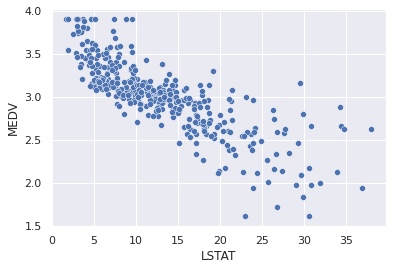

In [14]:
#REMOVING NON LINEARITY FROM LSTAT
seaborn.scatterplot(inputs['LSTAT'], targets)

In [21]:
inputs_scaled = StandardScaler().fit_transform(inputs)

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)
reg = LinearRegression()
reg.fit(x_train, y_train)

y_hat = reg.predict(x_train)
x_test.shape

(79, 11)

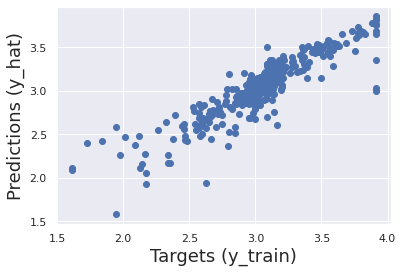

In [16]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.show()

In [17]:
y_hat_test = reg.predict(x_test)
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])

y_test = y_test.reset_index(drop=True)
df_pf['Target'] = np.exp(y_test)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,79.000000,79.000000,79.000000,79.000000
mean,21.707336,21.743038,0.035702,14.590045
std,7.945831,8.558946,4.003512,13.827988
min,6.753812,7.200000,-7.420035,0.604317
25%,16.065592,16.450000,-2.014707,4.670167
50%,20.674393,20.700000,-0.889230,9.490485
75%,27.569004,26.700000,1.217192,20.642915
max,41.536794,50.000000,12.899389,71.188465


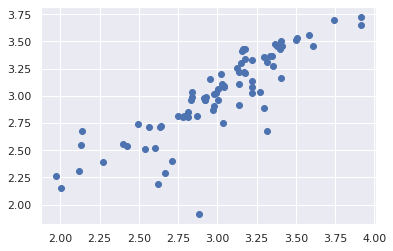

In [23]:
plt.scatter(y_test, y_hat_test)

In [18]:
df_pf

,Prediction,Target,Residual,Difference%
0,18.396595,23.1,4.703405,20.361060
1,21.993445,20.9,-1.093445,5.231792
2,15.637931,20.8,5.162069,24.817641
3,21.862912,20.9,-0.962912,4.607233
4,24.600680,20.6,-4.000680,19.420776
...,...,...,...,...
74,16.493253,16.1,-0.393253,2.442565
75,21.379541,20.1,-1.279541,6.365873
76,19.845544,17.1,-2.745544,16.055812
77,19.289178,20.1,0.810822,4.033941


In [19]:
reg.score(x_train, y_train)

0.8062380915717368

In [20]:
r2 = reg.score(x_train,y_train)
n = x_train.shape[0]
p = x_train.shape[1]

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7992038308697206